<a href="https://colab.research.google.com/github/arshiya-commits/MyntraCLone/blob/main/dl_practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


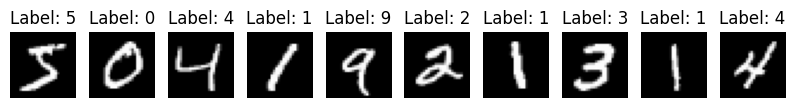

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset (MNIST - Handwritten Digits)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shape of the dataset
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Testing data shape:", X_test.shape)    # (10000, 28, 28)

# Display the first 5 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")   # Display label
    plt.axis('off')  # Hide axes

plt.show()


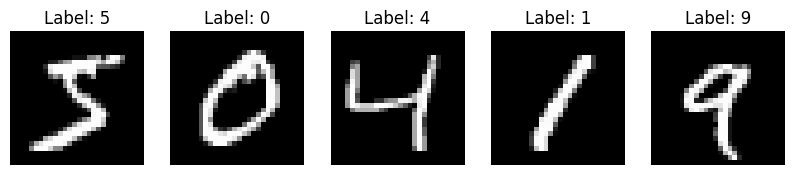

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset (MNIST - Handwritten Digits)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the dataset (scale pixel values to [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Display the first 5 images AFTER normalization
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")   # Display label
    plt.axis('off')  # Hide axes

plt.show()


In [ ]:
import tensorflow as tf

# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

# Print min and max values to check the range
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


In [ ]:
import tensorflow  as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_train,X_test=X_train/255.0,X_train/255

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8760 - loss: 0.4357
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9665 - loss: 0.1168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9775 - loss: 0.0759
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0569
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9859 - loss: 0.0453


In [ ]:
test_loss,test_acc=model.evaluate(X_test[:10000],Y_test[:10000])
print('test accuracy',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0984 - loss: 14.3932
test accuracy 0.10029999911785126


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data=np.array([
    [50,2,0],
    [20, 0, 0],  # Not Spam (fewer words, no links)
    [100, 5, 1], # Spam (many words, many links)
    [30, 1, 0],  # Not Spam
    [80, 4, 1],  # Spam
    [15, 0, 0]   # Not Spam
])

In [ ]:
x=data[:,:-1] # all rows except the last column
y=data[:,-1]  #all rows only the last column

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)

Perceptron()

In [ ]:
y_pred=perceptron.predict(X_test)#perceptron.predict(X_test) uses the trained model to predict labels (spam or not spam) for new data (X_test).
#y_pred=[0,1,0]

In [ ]:
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.5


In [ ]:
new_email = np.array([[60, 2]])  # 60 words, 2 links
prediction = perceptron.predict(new_email)
print("Spam" if prediction == 1 else "Not Spam")

Spam


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [ ]:
mnist=fetch_openml("mnist_784")
x,y=mnist["data"],mnist["target"]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.1)

In [ ]:
mlp.fit(X_train,Y_train)
y_pred=mlp.predict(X_test)
accuracy=accuracy_score(y_pred,Y_test)
print(accuracy)

0.10435714285714286


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
mnist=fetch_openml("mnist_784")
x,y=mnist["data"],mnist["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=0.1)
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.10271428571428572


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train=X_train.reshape(-1,28,28,1)/255.0
X_test=X_test.reshape(-1,28,28,1)/255.0
Y_train=to_categorical(Y_train,num_classes=10)
Y_test = to_categorical(Y_test,num_classes= 10) #converting the labels into binary vectors


In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    optimizer='adam'
)

In [ ]:
model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9861 - val_loss: 0.0450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9862 - val_loss: 0.0435
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9864 - val_loss: 0.0457
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9860 - val_loss: 0.0502
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9852 - val_loss: 0.0593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9840 - val_loss: 0.0637
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 0.9843 - val_loss: 0.0604
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9984 -

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


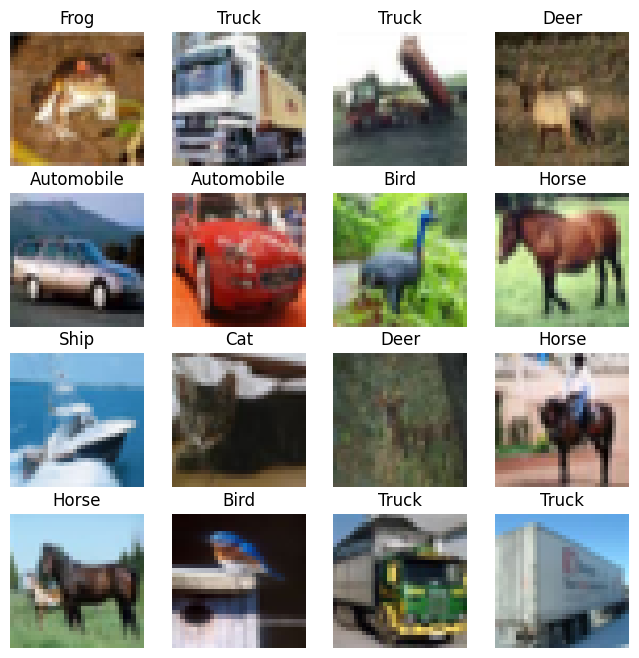

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Function to display sample images
def plot_cifar_images(images, labels, num_images=16):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)  # 4x4 grid
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])  # Labels are stored as arrays
        plt.axis("off")  # Hide axes
    plt.show()

# Show the first 16 images from the training set
plot_cifar_images(X_train, Y_train, num_images=16)


In [ ]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print(test_loss,test_acc)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 32, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()


In [ ]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)


In [ ]:
model=Sequential([
    Conv2D(32,(3,3) ,activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64,activation="relu"),
     Dense(10,activation="softmax")


 ])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

In [ ]:
model.fit(X_train,Y_train,batch_size=128,epochs=3,validation_data=(X_test,Y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.3614 - loss: 1.7789 - val_accuracy: 0.5134 - val_loss: 1.3748
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5377 - loss: 1.3072 - val_accuracy: 0.5710 - val_loss: 1.2236
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.5966 - loss: 1.1582 - val_accuracy: 0.6020 - val_loss: 1.1430


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6068 - loss: 1.1335
Test loss: 1.1430007219314575
Test accuracy: 0.6019999980926514


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalMaxPooling1D,Conv1D,Embedding

In [ ]:
texts = ["I love this!", "I hate this!"]
labels = [1, 0]  # 1 = Positive, 0 = Negative



In [ ]:
#Tokenizer
tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts) # for assigning the order i--1,love--2 ,this--3
sequences=tokenizer.texts_to_sequences(texts) #[1,2,3]
data=pad_sequences(sequences,maxlen=10)

In [ ]:
labels=tf.convert_to_tensor(labels)

In [ ]:
model=Sequential([
    Embedding(1000,16),
    Conv1D(16,3,activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1,activation='sigmoid')
]
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(data, labels, epochs=2, verbose=1)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6957
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.6937


In [ ]:
# Prediction
new_text = input("Enter a sentence: ")
seq = tokenizer.texts_to_sequences([new_text])
data = pad_sequences(seq, maxlen=10)
prediction = model.predict(data)[0][0]

# Output Result
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")

Enter a sentence: i hate u
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sentiment: Negative


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Sample text and labels
texts = ["I love this", "I hate this"]
labels = [1, 0]  # 1 = Positive, 0 = Negative

# Tokenization
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=5)

# Convert labels to tensor
labels = tf.convert_to_tensor(labels)

# Simple RNN Model
model = Sequential([
    Embedding(1000, 16),
    SimpleRNN(16),  # Basic RNN layer
    Dense(1, activation='sigmoid')
])

# Compile & Train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(data, labels, epochs=2, verbose=1)

# Prediction
new_text = input("Enter a sentence: ")
seq = tokenizer.texts_to_sequences([new_text])
data = pad_sequences(seq, maxlen=5)
prediction = model.predict(data)[0][0]

# Output Result
print("Sentiment:", "Positive" if prediction > 0.5 else "Negative")


Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6975
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6948
Enter a sentence: i love it
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Sentiment: Negative


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
import numpy as np
X=np.array([[1,2,3],[2,3,4],[3,4,5]])
Y=np.array([4,5,6])
X=X.reshape((X.shape[0],X.shape[1],1))


In [ ]:
model=Sequential([
    SimpleRNN(10,activation='relu',input_shape=(3,1)),#3 timestamps,1 feature
    Dense(1)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [ ]:
model.fit(X,Y,epochs=200,verbose=0)

In [ ]:
test_seq=np.array([4,5,6]).reshape((1,3,1))
prediction=model.predict(test_seq)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [ ]:
print("Next number in sequence:", round(prediction))

Next number in sequence: 7


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
X_train,X_test=X_train/255.0,X_test/255.0

In [ ]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(28, 28)),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [1]:
# Compile & Train
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=3, batch_size=64, validation_data=(X_test, Y_test))

# Evaluate
loss, acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", acc)

NameError: name 'model' is not defined

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

In [10]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [11]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [12]:
X_train = X_train.reshape(-1, 32, 96)
X_test = X_test.reshape(-1, 32, 96)

In [13]:
model=Sequential([
    SimpleRNN(128,activation='relu',input_shape=(32,96)),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
model.fit(X_train,Y_train,epochs=3,batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2199 - loss: 2.1021 - val_accuracy: 0.3029 - val_loss: 1.8615
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.3110 - loss: 1.8450 - val_accuracy: 0.3353 - val_loss: 1.7899
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.3422 - loss: 1.7699 - val_accuracy: 0.3588 - val_loss: 1.7500


In [18]:
loss, acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3457 - loss: 1.7519
Test Accuracy: 0.3587999939918518


In [20]:
import numpy as np
import pandas as pd
from sklearn.neural_network import  MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [30]:
iris=load_iris()
x=iris.data
y=iris.target


In [31]:
param_grid={
    "hidden_layer_sizes":[(10,),(50,),(100,)],
    "activation":["relu","tanh"],
    "learning_rate_init":[0.01,0.05,0.1],
    "alpha":[0.0001,0.001,0.01],
}

In [32]:
mlp=MLPClassifier()
grid_search=GridSearchCV(mlp,param_grid,cv=5)
grid_search.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate_init': [0.01, 0.05, 0.1]})

In [34]:
print("BEst parametrs:",grid_search.best_params_)
print("best Score",grid_search.best_score_)

BEst parametrs: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
best Score 0.9866666666666667


In [51]:
import numpy as np
import tensorflow as ts
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

In [53]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [54]:
def create_cnn(filters=32, kernel_size=3, optimizer='adam'):
    model = Sequential([
        Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [55]:
cnn_model = KerasClassifier(model=create_cnn, optimizer='adam', filters=32, kernel_size=3, epochs=3, batch_size=64, verbose=0)

# Define hyperparameter grid
param_grid = {
    "filters": [32, 64],
    "kernel_size": [3, 5],
    "optimizer": ["adam", "sgd"]
}

# Perform Grid Search
grid_search = GridSearchCV(cnn_model, param_grid, cv=3)
grid_search.fit(X_train, Y_train)

# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define function to create CNN model
def create_cnn(filters=32, kernel_size=3, optimizer='adam'):
    model = Sequential([
        Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap model using KerasClassifier
cnn_model = KerasClassifier(model=create_cnn, verbose=0)

# Define hyperparameters for tuning
param_grid = {
    "model__filters": [32, 64],
    "model__kernel_size": [3, 5],
    "optimizer": ['adam', 'sgd']
}

# Perform Grid Search
grid_search = GridSearchCV(cnn_model, param_grid, cv=3)
grid_search.fit(X_train, Y_train)

# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [1]:


!pip install --upgrade scikit-learn scikeras tensorflow keras


ERROR: Operation cancelled by user


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define function to create CNN model
def create_cnn(filters=32, kernel_size=3, optimizer='adam'):
    model = Sequential([
        Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap model using KerasClassifier
cnn_model = KerasClassifier(model=create_cnn, optimizer="adam", filters=32, kernel_size=3, verbose=0)

# Define hyperparameters for tuning
param_grid = {
    "filters": [32, 64],  # No need for "model__" prefix in scikeras
    "kernel_size": [3, 5],
    "optimizer": ['adam', 'sgd']
}

# Perform Grid Search
grid_search = GridSearchCV(cnn_model, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, Y_train)

# Print best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path (Make sure to replace this with your actual folder)
dataset_path = "/content/images/"

# Image size and batch size
img_size = (128, 128)  # Resize all images to 128x128
batch_size = 32

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values (0-1)

# Load images from folder
dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for two classes
)

# Print dataset info
print("Dataset Loaded Successfully!")
print(f"Found {dataset.samples} images belonging to {dataset.num_classes} classes.")


Found 0 images belonging to 0 classes.
Dataset Loaded Successfully!
Found 0 images belonging to 0 classes.


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


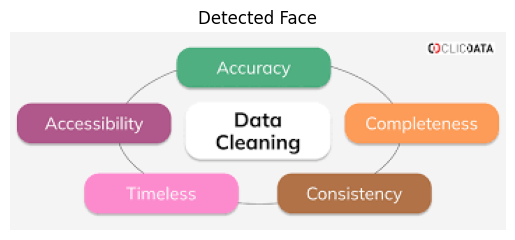

Extracted Face Features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2

# Load Pretrained MobileNetV2 model for feature extraction
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (224, 224))  # Resize to match model input
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to extract face features
def extract_face_features(image_path):
    image = preprocess_image(image_path)
    features = model.predict(image)  # Extract features using CNN
    return features.flatten()  # Flatten to a 1D vector

# Load and process an image
image_path = "/data cleaning.png"  # Replace with your image path
features = extract_face_features(image_path)

# Display Image
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Face")
plt.show()

print("Extracted Face Features:", features[:10])  # Display first 10 feature values


In [13]:
import cv2

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Read the image
image = cv2.imread("/data cleaning.png")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw a rectangle around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the output
cv2.imshow("Face Detected", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


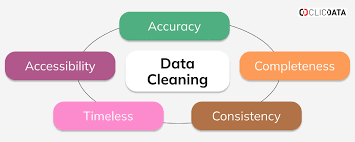

In [14]:
import cv2
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Read the image
image = cv2.imread("/data cleaning.png")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw a rectangle around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image in Colab
cv2_imshow(image)


In [8]:
import os

# Create a folder named 'images' inside Colab
folder_path = "/content/images"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created successfully!")

# Check if the folder exists
print("Folders in content directory:", os.listdir("/content/"))


Folder '/content/images' created successfully!
Folders in content directory: ['.config', '.ipynb_checkpoints', 'images', 'dir', 'sample_data']


In [9]:

from google.colab import files
import shutil

# Upload images
uploaded = files.upload()

# Move uploaded images to the 'images' folder
for filename in uploaded.keys():
    shutil.move(filename, "/content/images/" + filename)

print("Images moved to 'images' folder successfully!")


Saving css image.jpg to css image.jpg
Images moved to 'images' folder successfully!


In [5]:
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [39]:
!pip install scikeras

